In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Q1: Save the dataset into pandas dataframe

In [3]:
# df_boston.head()
df =pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Q2: Use different histograms to plot features that have right, left and zero skew.

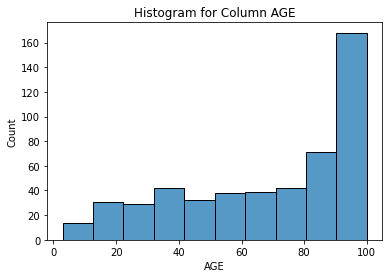

In [4]:
sns.histplot(df['AGE']) #right skew
plt.title('Histogram for Column AGE');

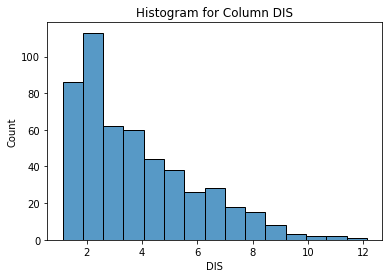

In [5]:
sns.histplot(df['DIS']) #left skew
plt.title('Histogram for Column DIS');

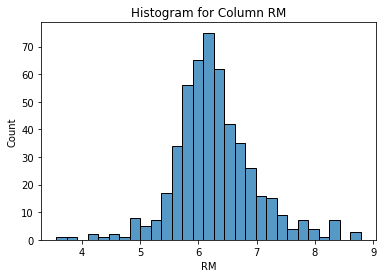

In [6]:
sns.histplot(df['RM']) #zero skew
plt.title('Histogram for Column RM');

## Q3: Prove your previous result using mean, median and mode.

In [7]:
# for all columns
statistics = pd.DataFrame({
    'Column': df.columns,
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0]
})

print(statistics)

          Column        Mean     Median       Mode
CRIM        CRIM    3.613524    0.25651    0.01501
ZN            ZN   11.363636    0.00000    0.00000
INDUS      INDUS   11.136779    9.69000   18.10000
CHAS        CHAS    0.069170    0.00000    0.00000
NOX          NOX    0.554695    0.53800    0.53800
RM            RM    6.284634    6.20850    5.71300
AGE          AGE   68.574901   77.50000  100.00000
DIS          DIS    3.795043    3.20745    3.49520
RAD          RAD    9.549407    5.00000   24.00000
TAX          TAX  408.237154  330.00000  666.00000
PTRATIO  PTRATIO   18.455534   19.05000   20.20000
B              B  356.674032  391.44000  396.90000
LSTAT      LSTAT   12.653063   11.36000    6.36000


In [8]:
print("Mean for AGE = "+ str(df['AGE'].mean())+ "\nMedian for AGE = "+ str(df['AGE'].median())+ "\nMode for AGE = "+ str(df['AGE'].mode()))

Mean for AGE = 68.57490118577078
Median for AGE = 77.5
Mode for AGE = 0    100.0
dtype: float64


In [9]:
print("Mean for DIS = "+ str(df['DIS'].mean())+ "\nMedian for DIS = "+ str(df['DIS'].median())+ "\nMode for DIS = "+ str(df['DIS'].mode()))

Mean for DIS = 3.795042687747034
Median for DIS = 3.2074499999999997
Mode for DIS = 0    3.4952
dtype: float64


In [10]:
print("Mean for RM = "+ str(df['RM'].mean())+ "\nMedian for RM = "+ str(df['RM'].median())+ "\nMode for RM = "+ str(df['RM'].mode()))

Mean for RM = 6.284634387351787
Median for RM = 6.2085
Mode for RM = 0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64


## Q4: Use Skew function of Pandas to print skewness of each feature.

In [11]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

## Q5: Use numpy to draw normal distribution.

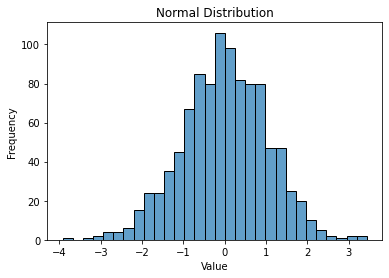

In [12]:
data = np.random.normal(0, 1, 1000)
sns.histplot(data, bins=30, alpha=0.7)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution');

## Q6: Use numpy to draw uniform distribution.

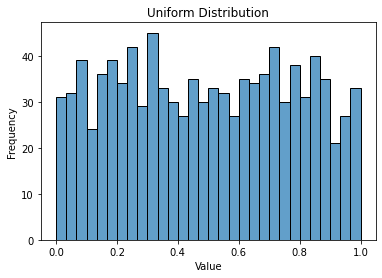

In [13]:
data = np.random.uniform(0, 1, 1000)
sns.histplot(data, bins=30, alpha=0.7)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Uniform Distribution');

## Q7: Use numpy to draw binomial distribution.

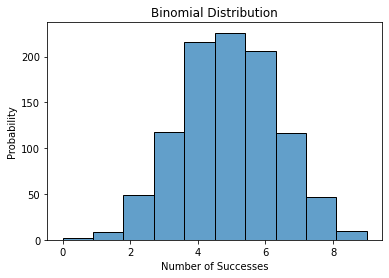

In [14]:
data = np.random.binomial(10, 0.5, 1000)
sns.histplot(data, bins=10, alpha=0.7)

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution');

## Q8: Simulate Two Coin Flips, then draw the result distribution.

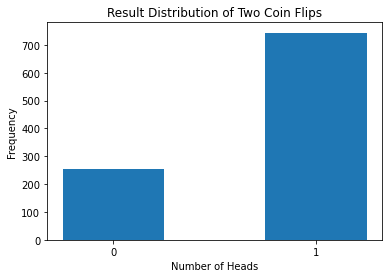

In [15]:
# Simulate two coin flips
coin_flips = np.random.randint(0, 2, size=(1000, 2))

# Count the number of heads
num_heads = np.sum(coin_flips, axis=1)

# Plot the result distribution
plt.hist(num_heads, bins=range(3), align='left', rwidth=0.5)

# Add labels and title
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Result Distribution of Two Coin Flips')

# Set the x-axis ticks and tick labels
plt.xticks(range(2));

## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [16]:
from scipy.stats import describe
from scipy import stats

stats.describe(df)

DescribeResult(nobs=506, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])), mean=array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01]), variance=array([7.39865782e+01, 5.43936814e+02, 4.70644425e+01, 6.45129730e-02,
       1.34276357e-02, 4.93670850e-01, 7.92358399e+02, 4.43401514e+00,
       7.58163660e+01, 2.84047595e+04, 4.68698912e+00, 8.33475226e+03,
       5.09947595e+01]), skewness=array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.6

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

- Z-test: Used when population standard deviation is known. T-test: Used when population standard deviation is unknown
- Z-test is used for 30 or more samples. T-test is used in 30 or less samples
- Z-test follows standard normal distribution. T-test follows T-distribution with heavier tails

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [19]:
import math

# Given data
population_mean = 70
population_std_dev = 10
sample_mean = 80
sample_size = 50
significance_level = 0.05

# Calculate the Z-value
z_value = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

print("The Z-value = "+str(z_value))
# For a 0.05 significance level (two-tailed test)
# Compare the Z-value with the critical Z-value
if z_value <= 1.96 and z_value >= -1.96:
    print("There is sufficient data")
else:
    print("There is not sufficient data, becuase Z-value is out of (-1.96 and 1.96)")


The Z-value = 7.0710678118654755
There is not sufficient data, becuase Z-value is out of (-1.96 and 1.96)


An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [20]:
# Given values
previous_mean = 40
recent_mean = 60
standard_deviation = 20
sample_size = 30

# Calculate the t-value
t = (recent_mean - previous_mean) / (standard_deviation / math.sqrt(sample_size))

# Print the t-value
print("t-value:", t)
print("Did a training program increase sales? Yes")


t-value: 5.477225575051661
Did a training program increase sales? Yes
